In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [3]:
maxlen = 500
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [5]:
model = models.Sequential([
    layers.Embedding(num_words, 128),
    layers.SimpleRNN(128),
    layers.Dense(1, activation='sigmoid')
])

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 73s 178ms/step - accuracy: 0.6000 - loss: 0.6503 - val_accuracy: 0.6436 - val_loss: 0.6207
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 63s 162ms/step - accuracy: 0.7021 - loss: 0.5738 - val_accuracy: 0.6403 - val_loss: 0.6241
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 67s 171ms/step - accuracy: 0.7681 - loss: 0.4998 - val_accuracy: 0.7905 - val_loss: 0.4680


In [9]:
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.7905200123786926


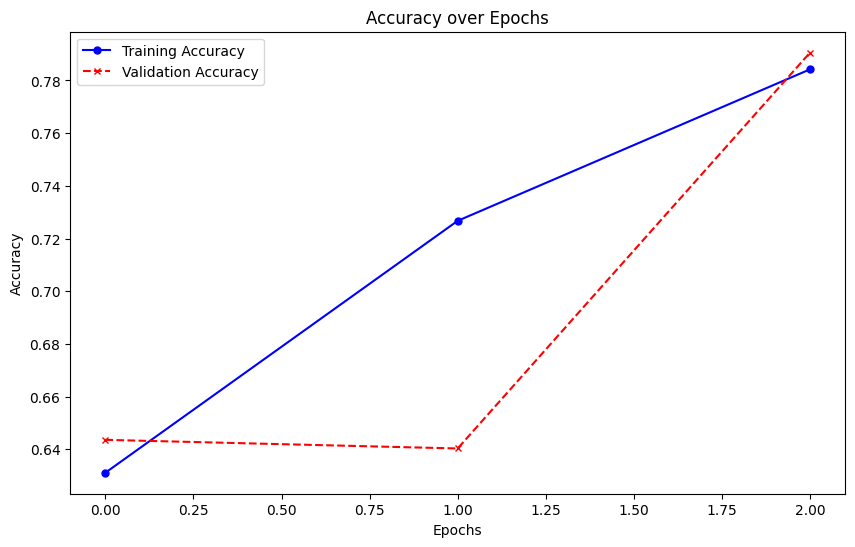

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', markersize=5, linestyle='-', color='b')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x', markersize=5, linestyle='--', color='r')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

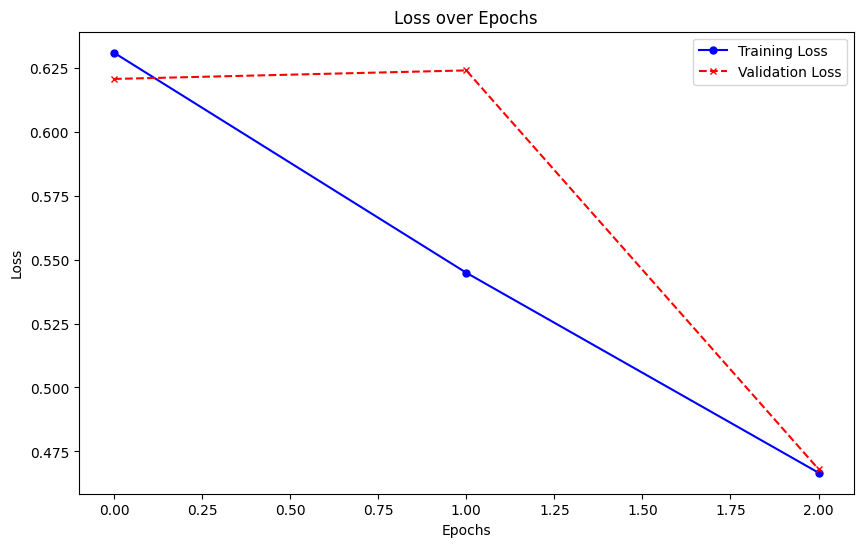

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o', markersize=5, linestyle='-', color='b')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x', markersize=5, linestyle='--', color='r')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()